Story-telling

Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Cleaning_functions
import Story_functions


Import csv

In [2]:
data = pd.read_csv('Input/bankdata.csv',encoding = 'latin-1')
years_table = pd.read_csv('Input/years_table.csv',encoding = 'latin-1')
purpose_table = pd.read_csv('Input/purpose_table.csv',encoding = 'latin-1')
Incomes_table = pd.read_csv('Input/Incomes_table.csv',encoding = 'latin-1')
display(data)


,Loan ID,Customer ID,Current Loan Amount($),Term,Annual Income($),Years in current job,Home Ownership,Purpose,Monthly Debt($),Current Credit Balance($),Maximum Open Credit($),Bankruptcies,Loan/Income Ratio,Monthly_debt/Income ratio,Credit/Income Ratio,Credit lef($)
0,f738779f,ded0b3c3,60000.0,Short Term,210000.0,10+ years,Mortgage,Debt Consolidation,4200.0,60000.0,110000.0,0.0,0.29,0.24,0.52,50000.0
1,6dcc0947,1630e6e3,30000.0,Short Term,190000.0,10+ years,Mortgage,Debt Consolidation,3700.0,70000.0,90000.0,0.0,0.16,0.23,0.47,20000.0
2,f7744d01,2c60938b,20000.0,Short Term,90000.0,2 years,Rent,Debt Consolidation,800.0,0.0,40000.0,0.0,0.22,0.11,0.44,40000.0
3,83721ffb,12116614,20000.0,Short Term,80000.0,10+ years,Rent,Debt Consolidation,1700.0,20000.0,50000.0,1.0,0.25,0.26,0.62,30000.0
4,08f3789f,39888105,30000.0,Short Term,180000.0,10+ years,Mortgage,Debt Consolidation,3900.0,40000.0,50000.0,0.0,0.17,0.26,0.28,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,4d0d0e65,add5361a,40000.0,Long Term,220000.0,6 years,Mortgage,Debt Consolidation,1700.0,40000.0,50000.0,0.0,0.18,0.09,0.23,10000.0
6882,6f0b1e02,879d5bf4,20000.0,Short Term,120000.0,1 year,Rent,Debt Consolidation,2000.0,30000.0,40000.0,0.0,0.17,0.20,0.33,10000.0
6883,a2701102,6dc5fa63,40000.0,Short Term,150000.0,7 years,Mortgage,Debt Consolidation,1900.0,40000.0,70000.0,0.0,0.27,0.15,0.47,30000.0
6884,c4ab66f9,8ee2002b,20000.0,Short Term,150000.0,6 years,Rent,Debt Consolidation,500.0,10000.0,20000.0,0.0,0.13,0.04,0.13,10000.0


,Annual Income($),Current Loan Amount($),Loan/Income Ratio,Monthly_debt/Income ratio,Credit/Income Ratio,N_incomes,Weight in portfolio(%)
0,10000.0,2500.00,0.25,0.18,1.00,4,0.06
1,20000.0,5882.35,0.29,0.17,1.15,17,0.25
2,30000.0,10333.33,0.34,0.19,0.93,60,0.87
3,40000.0,12035.40,0.30,0.20,0.73,113,1.64
4,50000.0,14468.09,0.29,0.19,0.63,235,3.41
5,60000.0,16666.67,0.28,0.19,0.60,342,4.97
6,70000.0,20492.17,0.29,0.19,0.59,447,6.49
7,80000.0,22880.00,0.29,0.19,0.55,500,7.26
8,90000.0,25817.22,0.28,0.19,0.51,569,8.26
9,100000.0,27250.44,0.27,0.19,0.53,571,8.29


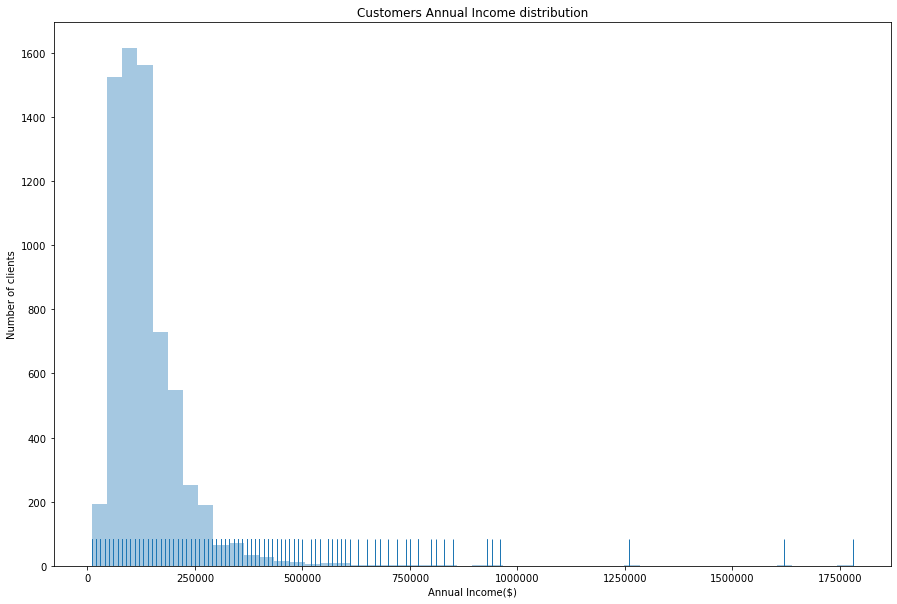

In [43]:
display(Incomes_table.head(20))
plt.figure(figsize=(15,10))
sns.distplot(data['Annual Income($)'], kde=False, rug=True)
plt.title('Customers Annual Income distribution')
plt.ylabel('Number of clients')
plt.xlabel('Annual Income($)')
plt.show()
#Our client's income distribution

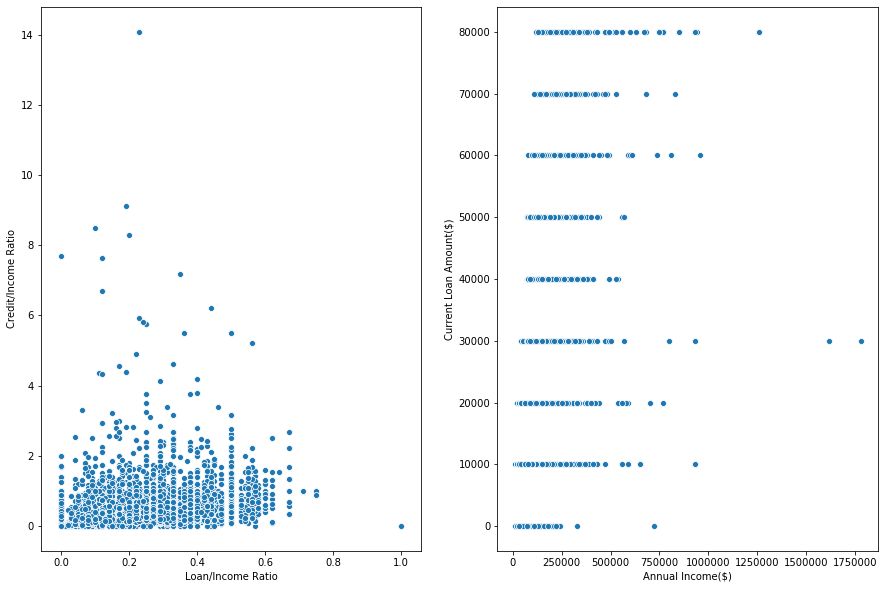

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.scatterplot(x="Loan/Income Ratio", y="Credit/Income Ratio",data=data)
plt.subplot(1,2,2)
sns.scatterplot(x="Annual Income($)", y="Current Loan Amount($)",data=data)
plt.show()
#Right relation between Loan/Income Ratio and Credit/Income Ratio
#Total loans disbursed by Customer's income

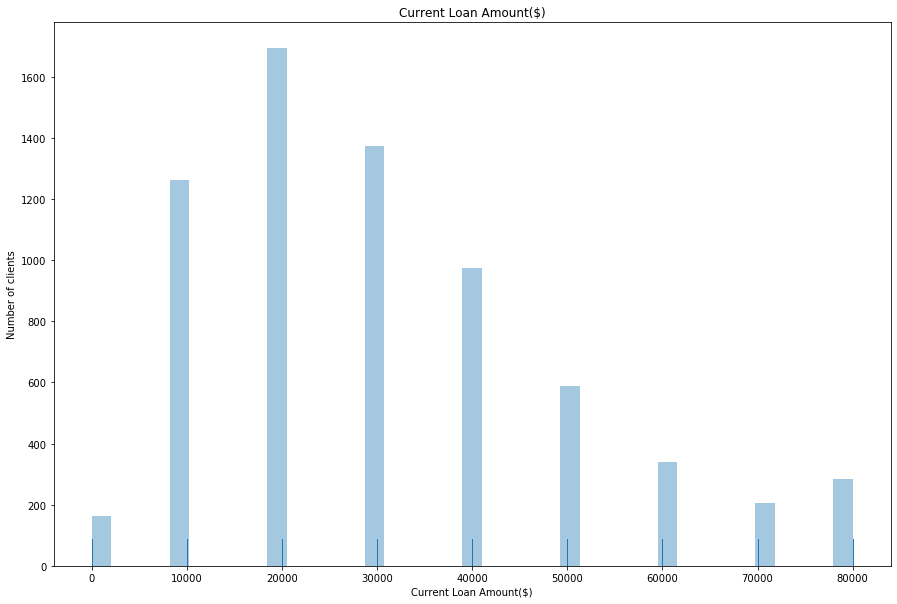

In [45]:
plt.figure(figsize=(15,10))
sns.distplot(data['Current Loan Amount($)'], kde=False, rug=True)
plt.title('Current Loan Amount($)')
plt.ylabel('Number of clients')
plt.xlabel('Current Loan Amount($)')
plt.show()
#Maybe we can target for smaller lending opportunities

,Purpose,Current Loan Amount($),Monthly Debt($),N_loans,Weight in portfolio(%)
0,Business Loan,35726,1532,117,1.699100
1,Buy House,29215,1625,51,0.740633
2,Buy a Car,19318,1148,88,1.277955
3,Debt Consolidation,32598,1912,5399,78.405460
4,Educational Expenses,12500,808,12,0.174267
5,Home Improvements,30806,1847,409,5.939588
6,Medical Bills,17415,1701,89,1.292477
7,Other,21215,1658,617,8.960209
8,Take a Trip,16428,1703,28,0.406622
9,major_purchase,29722,1158,36,0.522800


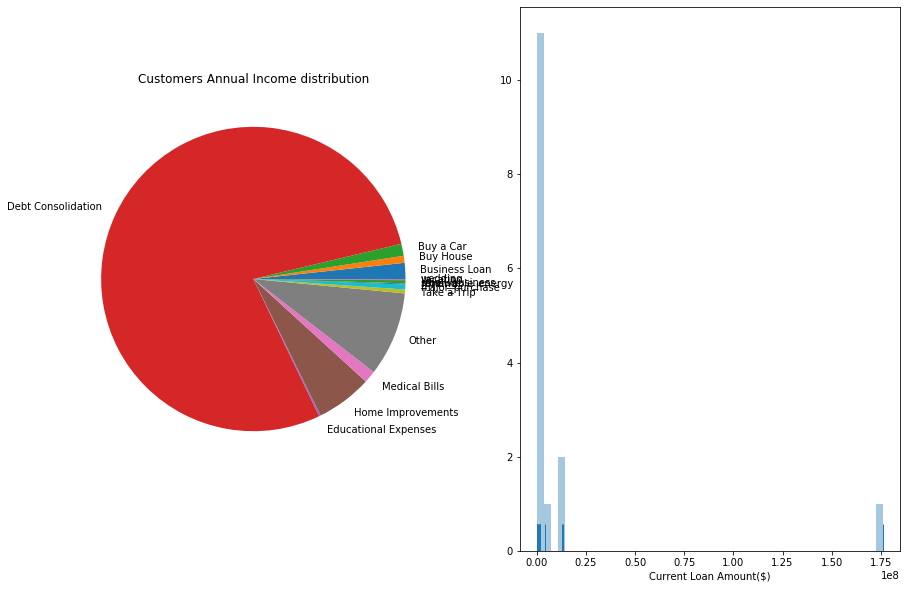

Purpose
Business Loan             4180000.0
Buy House                 1490000.0
Buy a Car                 1700000.0
Debt Consolidation      176000000.0
Educational Expenses       150000.0
Home Improvements        12600000.0
Medical Bills             1550000.0
Other                    13090000.0
Take a Trip                460000.0
major_purchase            1070000.0
moving                     170000.0
renewable_energy            30000.0
small_business             850000.0
vacation                    80000.0
wedding                    170000.0
Name: Current Loan Amount($), dtype: float64

In [53]:
display(purpose_table)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.pie(purpose_table['Weight in portfolio(%)'], labels = purpose_table['Purpose'])
plt.title('Current Loan Purpose')
plt.subplot(1,2,2)
resultsPurpose = data['Current Loan Amount($)'].groupby(data['Purpose']).sum()
sns.distplot(resultsPurpose, kde=False, rug=True)
plt.show()
display(resultsPurpose)